In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
df = pd.read_csv('House Price Prediction Dataset.csv')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [62]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [6]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


2. There is a huge difference between the year built. the min is 1900 and the max is 2023.
3. the price range is also big. the min is 50k whereas the max is almost 1 million. and the mean is 500k
4. the min number of bedrooms is 1 and the max is 3 moreover, the area also has a huge range with the min being 501 and the max being almost 5000. and the mean is 2000.

In [7]:
import plotly.express as px
import matplotlib

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
#Let's Start with Area
df.Area.describe()

,Area
count,2000.000000
mean,2786.209500
std,1295.146799
min,501.000000
25%,1653.000000
50%,2833.000000
75%,3887.500000
max,4999.000000


In [10]:
fig = px.histogram(df,
                   x='Area',
                   marginal='box',
                   nbins=47,
                   title='Area Distribution')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of the area seems uniform for the most part

In [11]:
#Bedrooms
fig = px.histogram(df,
                   x='Bedrooms',
                   marginal='box',
                   nbins=47,
                   title='Bedrooms Distribution')
fig.update_layout(bargap=0.1)
fig.show()

Bedroom distribution is also uniform

In [ ]:
#Bathrooms

In [12]:
fig = px.histogram(df,
                   x='Bathrooms',
                   marginal='box',
                   nbins=47,
                   title='Bathrooms Distribution')
fig.update_layout(bargap=0.1)
fig.show()

Also uniform, with 3 and 4 slightly higher.

In [13]:
#year built
fig = px.histogram(df,
                   x='YearBuilt',
                   marginal='box',
                   nbins=47,
                   title='Year Built Distribution')
fig.update_layout(bargap=0.1)
fig.show()

Also Uniform

In [14]:
#let't the prices of with or without a garage
fig = px.histogram(df,
                  x='Price',
                  marginal='box',
                  color='Garage',
                  color_discrete_sequence=['green', 'grey'],
                  title='House Prices')
fig.update_layout(bargap=0.1)
fig.show()

houses between 50k and 100k: There are 41 with no garage and 70 with a garage

This shows that Garages might influence the price of housing.

In [15]:
#Location
fig = px.histogram(df,
                  x='Price',
                  marginal='box',
                  color='Location',
                  color_discrete_sequence=['green', 'grey', 'blue', 'red'],
                  title='Prices for Location')
fig.update_layout(bargap=0.1)
fig.show()

Most prices are unifrom across the regions. it seems that most of them fall in the middle. With Urban having the most lower end houses.

In [16]:
#Condition
fig = px.histogram(df,
                  x='Price',
                  marginal='box',
                  color='Condition',
                  color_discrete_sequence=['green', 'grey', 'blue', 'red'],
                  title='Prices for Condition')
fig.update_layout(bargap=0.1)
fig.show()

There is a lot of houses with poor condition. This could be explained with vintage houses, or historical houses that have a high price tag as a result but might be in poor condition.

In [17]:
#Area and Price
fig = px.scatter(df,
                 x='Area',
                 y='Price',
                 color='Garage',
                 opacity=0.8,
                 hover_data=['YearBuilt'],
                 title='Area vs. Price')
fig.update_traces(marker_size=5)
fig.show()

There is no clear Relationship or clusters between Area and Price

In [18]:
#Bedrooms and Price
fig = px.violin(df,
                 x='Bedrooms',
                 y='Price',
                 color='Garage',
                 hover_data=['YearBuilt'],
                 title='Bedrooms vs. Price')
fig.update_traces(marker_size=5)
fig.show()

# Correlation

In [19]:
df.Price.corr(df.Area)

0.0015421203243642292

In [20]:
df.Price.corr(df.Bedrooms)

-0.0034705031681084553

In [21]:
df.Price.corr(df.Bathrooms)

-0.015737372192616055

In [22]:
df.Price.corr(df.YearBuilt)

0.004845163834697287

In [23]:
print(df['Garage'].unique())

['No' 'Yes']


In [24]:
print(df['Price'].unique())

[149919 424998 266746 ... 476925 161119 482525]


In [48]:
df_num = df.select_dtypes(include=['number'])
corr_matrix = df_num.corr()
print(corr_matrix)

                 Id      Area  Bedrooms  Bathrooms    Floors  YearBuilt  \
Id         1.000000 -0.012966 -0.016393  -0.025433 -0.002025   0.008840   
Area      -0.012966  1.000000  0.047523   0.021881  0.017749  -0.011609   
Bedrooms  -0.016393  0.047523  1.000000  -0.011990  0.010435  -0.014125   
Bathrooms -0.025433  0.021881 -0.011990   1.000000  0.029089  -0.000839   
Floors    -0.002025  0.017749  0.010435   0.029089  1.000000  -0.006474   
YearBuilt  0.008840 -0.011609 -0.014125  -0.000839 -0.006474   1.000000   
Price     -0.025643  0.001542 -0.003471  -0.015737  0.055890   0.004845   

              Price  
Id        -0.025643  
Area       0.001542  
Bedrooms  -0.003471  
Bathrooms -0.015737  
Floors     0.055890  
YearBuilt  0.004845  
Price      1.000000  


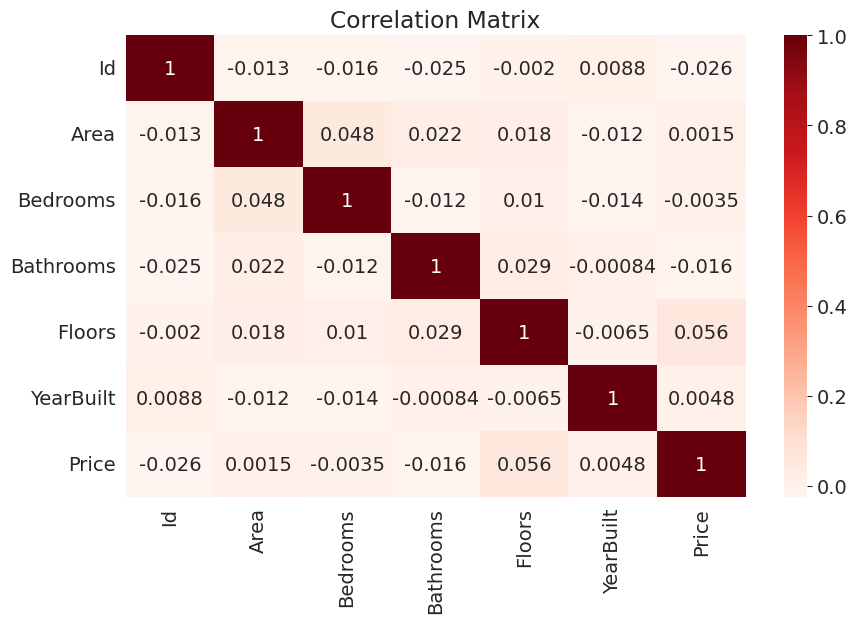

In [29]:
sns.heatmap(corr_matrix, cmap='Reds', annot=True)
plt.title('Correlation Matrix');

It looks like single features have low correlation among them hence I will use Multiple features instead.

In [30]:
model = LinearRegression()

In [31]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [32]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [49]:
# Create inputs and targets
inputs, targets = df_num[['Area', 'Bedrooms']], df_num['Price']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 276357.6619964855


In [50]:
df_num.Price.corr(df_num.Area)

0.0015421203243642292

In [51]:
df_num.Price.corr(df_num.Bedrooms)

-0.0034705031681084553

In [52]:
fig = px.scatter(df_num, x='Area', y='Price', title='Area vs. Price')
fig.update_traces(marker_size=5)
fig.show()

In [53]:
fig = px.scatter(df_num, x='Bedrooms', y='Price', title='Bedrooms vs. Price')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
#let's check parameters of the model

In [39]:
model.coef_, model.intercept_

(array([ 3.65167928e-01, -6.89189228e+02]), 538729.4004969919)

Let's add the floors column which has the highest correlation

In [54]:
df_num.Price.corr(df.Floors)

0.055890259689213795

In [55]:
fig = px.strip(df_num, x='Floors', y='Price', title= "Floors vs. Price")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [56]:
# Create inputs and targets
inputs, targets = df_num[['Area', 'Bedrooms', 'Floors']], df_num['Price']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 275925.4060565878


There isn't a big reduction in the loss.

In [57]:
inputs, targets = df_num[['Area', 'Bedrooms', 'Floors', 'YearBuilt']], df_num['Price']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 275921.72260685486


Again the loss didn't go by much, let's try adding all numerical features.

In [58]:
inputs, targets = df_num[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']], df_num['Price']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 275879.628399703


Still the loss didn't get reduced my much.

# Using Categorical Features

In [63]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


# Binary Categories
The garage column has two values, 'Yes', 'No'

In [90]:
Garage_values = {'No': 0, 'Yes': 1}
df['Garage_values'] = df.Garage.map(Garage_values)

In [91]:
df.Price.corr(df.Garage_values)

0.0028421499555363297

In [92]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Downtown,Rural,Suburban,Urban,Garage_values
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919,1.0,0.0,0.0,0.0,0
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998,1.0,0.0,0.0,0.0,0
2,3,3592,2,2,3,1938,Downtown,Good,No,266746,1.0,0.0,0.0,0.0,0
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020,0.0,0.0,1.0,0.0,1
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620,0.0,0.0,1.0,0.0,0
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0.0,0.0,1.0,0.0,1
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925,0.0,1.0,0.0,0.0,0
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119,0.0,0.0,0.0,1.0,1


Now we'll use Garage_values for linear regression

In [93]:
inputs, targets = df[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Garage_values']], df['Price']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 275878.32843340415


# One Hot Encoding for Location and Condition

<Axes: xlabel='Location', ylabel='Price'>

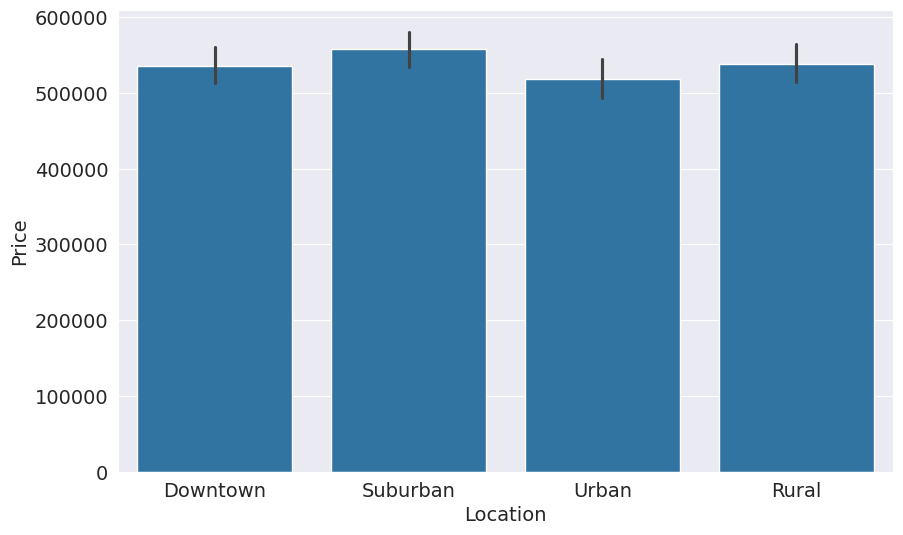

In [94]:
sns.barplot(data=df, x='Location', y='Price')

In [95]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['Location']])
enc.categories_

[array(['Downtown', 'Rural', 'Suburban', 'Urban'], dtype=object)]

In [96]:
one_hot = enc.transform(df[['Location']]).toarray()
one_hot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [97]:
df[['Downtown', 'Rural', 'Suburban', 'Urban']] = one_hot

In [98]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Downtown,Rural,Suburban,Urban,Garage_values
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919,1.0,0.0,0.0,0.0,0
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998,1.0,0.0,0.0,0.0,0
2,3,3592,2,2,3,1938,Downtown,Good,No,266746,1.0,0.0,0.0,0.0,0
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020,0.0,0.0,1.0,0.0,1
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620,0.0,0.0,1.0,0.0,0
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0.0,0.0,1.0,0.0,1
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925,0.0,1.0,0.0,0.0,0
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119,0.0,0.0,0.0,1.0,1


Let's add the region columns to our linear regression model

In [99]:
inputs, targets = df[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Garage_values', 'Downtown', 'Rural', 'Suburban', 'Urban']], df['Price']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 275542.5309308224


This is but a small Redution

In [100]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['Condition']])
enc.categories_
one_hot2 = enc.transform(df[['Condition']]).toarray()
one_hot2

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [101]:
enc.categories_

[array(['Excellent', 'Fair', 'Good', 'Poor'], dtype=object)]

In [102]:
df[['Excellent', 'Fair', 'Good', 'Poor']] = one_hot2

In [103]:
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Downtown,Rural,Suburban,Urban,Garage_values,Excellent,Fair,Good,Poor
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0
2,3,3592,2,2,3,1938,Downtown,Good,No,266746,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056,1.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,1.0
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,1.0
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0,0.0


Now Let's add the condition to our linear model

In [104]:
inputs, targets = df[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
                  'Garage_values', 'Downtown', 'Rural', 'Suburban', 'Urban',
                      'Excellent', 'Fair', 'Good', 'Poor']], df['Price']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 275212.4701846433


The loss is getting reduced by it's very smalle

# Feature Scaling

In [105]:
model.coef_

array([ 9.26126608e-02, -6.16932452e+02, -4.00822345e+03,  1.95687800e+04,
        4.99216413e+01,  5.51548797e+02, -1.23381943e+03,  3.59966918e+02,
        1.98578126e+04, -1.89839601e+04, -6.25827638e+03,  2.30449193e+04,
       -8.17291034e+03, -8.61373259e+03])

In [106]:
model.intercept_

412038.5993835705

In [108]:
input_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
            'Garage_values', 'Downtown', 'Rural', 'Suburban', 'Urban',
              'Excellent', 'Fair', 'Good', 'Poor']

In [109]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,Area,0.092613
1,Bedrooms,-616.932452
2,Bathrooms,-4008.223450
3,Floors,19568.779969
4,YearBuilt,49.921641
5,Garage_values,551.548797
6,Downtown,-1233.819427
7,Rural,359.966918
8,Suburban,19857.812582
9,Urban,-18983.960073


In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
numeric_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [112]:
scaler.mean_

array([2.7862095e+03, 3.0035000e+00, 2.5525000e+00, 1.9935000e+00,
       1.9614460e+03])

In [113]:
scaler.var_

array([1.67656653e+06, 2.02848775e+00, 1.22924375e+00, 6.54457750e-01,
       1.29008208e+03])

In [114]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.10147065,  1.40179052,  1.30556821,  1.24415065,  0.23815548],
       [ 1.14748543,  1.40179052,  1.30556821,  1.24415065, -0.09594152],
       [ 0.62231712, -0.70458141, -0.49832569,  1.24415065, -0.65276985],
       ...,
       [-1.33161794,  1.40179052, -1.40027264,  0.00803475, -1.62721943],
       [ 0.9853011 , -0.00245743, -1.40027264,  0.00803475, -0.70845269],
       [ 0.15661639,  1.40179052, -1.40027264,  1.24415065, -1.62721943]])

In [115]:
cat_cols = ['Garage_values', 'Downtown', 'Rural', 'Suburban', 'Urban',
              'Excellent', 'Fair', 'Good', 'Poor']
categorical_data = df[cat_cols].values

In [116]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = df.Price

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 275236.51196561474


In [117]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
14,1,8.069575e+18
8,Suburban,4.294719e+17
7,Rural,4.294719e+17
6,Downtown,4.294719e+17
9,Urban,4.294719e+17
3,Floors,1.623576e+04
4,YearBuilt,2.502799e+03
0,Area,-2.885899e+01
5,Garage_values,-7.546023e+02
1,Bedrooms,-7.973405e+02


The most important features are, Location, Floors then Year built.

Creating a Test Set

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [133]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 276843.59916243324


In [134]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 275539.42365611374
